In [ ]:
from google.colab import drive
drive.mount(r"/content/drive/")

Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive/8. Introduction to deep learning for computer vision

/content/drive/My Drive/8. Introduction to deep learning for computer vision


# 8.1 Introduction to convnets

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, optimizers, losses, metrics, datasets, Model
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
one_hot_train = keras.utils.to_categorical(train_labels)
one_hot_test = keras.utils.to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
inputs = Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(units=10, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0     

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=metrics.SparseCategoricalAccuracy()
)
model.fit(
    x=train_images,
    y=train_labels,
    epochs=3,
    validation_data=(test_images, test_labels),
    batch_size=64
)

Epoch 1/3
938/938 [==============================] - 59s 62ms/step - loss: 0.1553 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.0502 - val_sparse_categorical_accuracy: 0.9837
Epoch 2/3
938/938 [==============================] - 58s 62ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0269 - val_sparse_categorical_accuracy: 0.9910
Epoch 3/3
938/938 [==============================] - 58s 62ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0233 - val_sparse_categorical_accuracy: 0.9918


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss:",test_loss, "Test accuracy:", test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0233 - sparse_categorical_accuracy: 0.9918
Test loss: 0.023262402042746544 Test accuracy: 0.9918000102043152


In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.CategoricalCrossentropy(),
    metrics=metrics.CategoricalAccuracy()
)
model.fit(
    x=train_images,
    y=one_hot_train,
    epochs=3,
    validation_data=(test_images, one_hot_test),
    batch_size=64
)

Epoch 1/3
938/938 [==============================] - 59s 62ms/step - loss: 0.0233 - categorical_accuracy: 0.9928 - val_loss: 0.0280 - val_categorical_accuracy: 0.9911
Epoch 2/3
938/938 [==============================] - 58s 62ms/step - loss: 0.0174 - categorical_accuracy: 0.9945 - val_loss: 0.0341 - val_categorical_accuracy: 0.9907
Epoch 3/3
938/938 [==============================] - 59s 63ms/step - loss: 0.0139 - categorical_accuracy: 0.9955 - val_loss: 0.0220 - val_categorical_accuracy: 0.9934


In [ ]:
test_loss, test_acc = model.evaluate(test_images, one_hot_test)
print(test_loss, test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0220 - categorical_accuracy: 0.9934
0.022047854959964752 0.993399977684021


### 8.1.2 The max-pooling operation

In [ ]:
inputs = Input(shape=(28, 28, 1), name="input")
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(units=10, activation="softmax", name="output")(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 61952)             0         
_________________________________________________________________
output (Dense)               (None, 10)                619530    
Total params: 712,202
Trainable params: 712,202
Non-trainable params: 0
_____________________________________________________

In [ ]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lamtrinh","key":"14f6d2e2e80becdadfcfa910aaf2f1d5"}'}

In [ ]:
mkdir ~/ .kaggle

mkdir: cannot create directory ‘/root/’: File exists
mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
cd ~

/root


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:08<00:00, 143MB/s]
100% 812M/812M [00:08<00:00, 103MB/s]


In [ ]:
rm dogs-vs-cats.zip

In [ ]:
cd /content/drive/My Drive/8. Introduction to deep learning for computer vision

/content/drive/My Drive/8. Introduction to deep learning for computer vision


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:06<00:00, 156MB/s]
100% 812M/812M [00:06<00:00, 132MB/s]


In [ ]:
!unzip  dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
ls

'Chapter 8.ipynb'   kaggle.json            test1.zip
 dogs-vs-cats.zip   sampleSubmission.csv   train.zip


In [ ]:
!unzip -qq train.zip

In [ ]:
ls

'Chapter 8.ipynb'   kaggle.json            test1.zip   train.zip
 dogs-vs-cats.zip   sampleSubmission.csv   train/


In [ ]:

a = [1,2,3]
a.remove(1)
a

[2, 3]

In [ ]:
re.match(".*dog.*", "g dfg dog is good")

<re.Match object; span=(0, 17), match='g dfg dog is good'>

In [ ]:
os.path.join('1', '2')

'1/2'

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


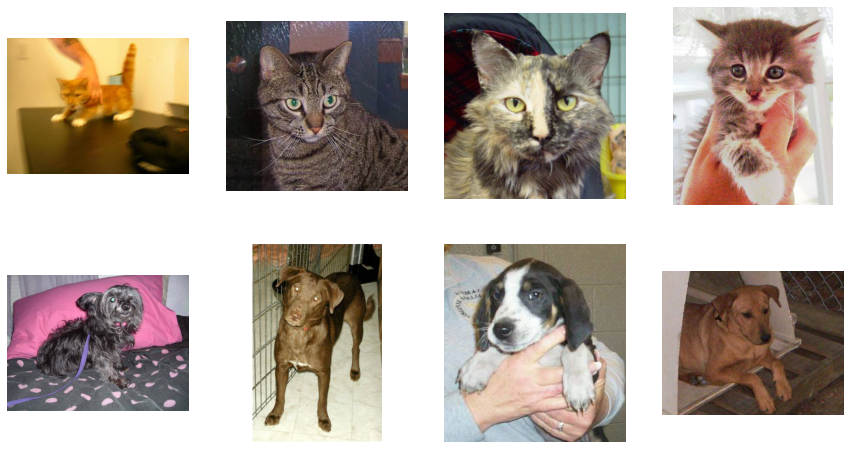

In [ ]:
%time
import re
import os
import matplotlib.pyplot as plt

train_image_names = os.listdir(r"./train")
fig = plt.figure(figsize=(15, 8))
cat = 0

for i in range(8):
  ax = fig.add_subplot(241+i)
  for image in train_image_names:
    if cat <=3:
      if re.match(".*cat.*", image):
        ax.imshow(plt.imread(os.path.join('train', image)))
        cat += 1
        train_image_names.remove(image)
        break
    else:
      if re.match(".*dog.*", image):
        ax.imshow(plt.imread(os.path.join('train', image)))
        train_image_names.remove(image)
        break

  ax.axis("off")


In [ ]:
!unzip -qq test1.zip

In [ ]:
ls

'Chapter 8.ipynb'   kaggle.json            test1/      train/
 dogs-vs-cats.zip   sampleSubmission.csv   test1.zip   train.zip


In [ ]:
import os
import pathlib  

In [ ]:
os.makedirs(pathlib.Path("../ss"))

In [ ]:
for i in pathlib.Path("train"):
  print(i)

TypeError: ignored

In [ ]:
with open("words.txt", "w") as file:
  file.write("blue\nforest\nsky\nocean\nrabbit\nclue")
  file.close()

In [ ]:
with open("words.txt", "r") as file:
    a = file.readline()

In [ ]:
from pathlib import Path
import os, shutil

In [ ]:
os.getdir()

AttributeError: ignored

In [ ]:
os.getcwd()

'/content/drive/My Drive/8. Introduction to deep learning for computer vision'

In [ ]:
len(os.listdir('./train'))

25000

In [ ]:
original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
      dir = new_base_dir / subset_name / category
      os.makedirs(dir)
      fnames = [f"{category}.{index}.jpg" for index in range(start_index, end_index)]
      for fname in fnames:
        shutil.copy(src=original_dir/fname,dst=dir/fname)


NameError: ignored

In [ ]:
make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2000)

NameError: ignored

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(scale=1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(units=1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from pathlib import Path
path = Path("./cats_vs_dogs_small")
train_path = path / "train"
val_path = Path('./cats_vs_dogs_small/validation')
test_path = path / 'test'

In [ ]:
train_dataset = image_dataset_from_directory(
    directory=train_path,
    image_size=(180, 180),
    batch_size=32
)
val_dataset = image_dataset_from_directory(
    directory=val_path,
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    directory=test_path,
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
np.random.normal??

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
data = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
random_numbers = np.random.rand(1000, 1000)
data = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i in data.batch(100):
  print(i)

tf.Tensor(
[[0.84886318 0.56265868 0.97599894 ... 0.46776984 0.32925816 0.30048316]
 [0.89183407 0.54509571 0.45886438 ... 0.32351932 0.50192319 0.63956592]
 [0.92707309 0.26921983 0.88777278 ... 0.58157424 0.64307559 0.03922594]
 ...
 [0.06718033 0.53788972 0.15664703 ... 0.58428856 0.79153417 0.5941085 ]
 [0.57245953 0.63316597 0.54018082 ... 0.62894432 0.25936296 0.95155394]
 [0.77551566 0.3836502  0.47288784 ... 0.85837505 0.73099323 0.69519402]], shape=(100, 1000), dtype=float64)
tf.Tensor(
[[0.83315096 0.97194769 0.29197342 ... 0.65010276 0.94047179 0.07195224]
 [0.91589286 0.26209379 0.48090917 ... 0.29167767 0.28396818 0.86410313]
 [0.46403737 0.12235146 0.28580671 ... 0.97786593 0.70546325 0.0447751 ]
 ...
 [0.37314081 0.79979806 0.96970891 ... 0.51053262 0.64269371 0.81121963]
 [0.18556722 0.91458368 0.13749688 ... 0.78989533 0.2159541  0.88047099]
 [0.40578382 0.95137664 0.80241302 ... 0.98824701 0.78855177 0.06103977]], shape=(100, 1000), dtype=float64)
tf.Tensor(
[[0.56800

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(np.random.normal(size=(10000, 6)))
batch_dataset = dataset.batch(2)
for i in batch_dataset:
  print(i.shape)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(np.random.normal(size=(1000, 16)))
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, shape=(4, 4)))
for i in reshaped_dataset:
  print(tf.shape(i))

In [ ]:
ls cats_vs_dogs_small

test/  train/  validation/


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r'cats_vs_dogs_small/train',
    image_size=(180, 180),
    batch_size=32
)
val_path = pathlib.Path('./cats_vs_dogs_small/validation')
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=val_path,
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


NameError: ignored

In [ ]:
train_dataset

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
for data_batch, label_batch in train_dataset:
  print(data_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
ls

 cats_vs_dogs_small/   kaggle.json            test1.zip   words.txt
'Chapter 8.ipynb'      sampleSubmission.csv   train/
 dogs-vs-cats.zip      test1/                 train.zip


In [ ]:
path = Path().cwd()
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=path,

    save_best_only=True,  
    monitor="val_loss"
)
history = model.fit(
    x=train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 685s 10s/step - loss: 0.7474 - binary_accuracy: 0.4910 - val_loss: 0.6958 - val_binary_accuracy: 0.5000
INFO:tensorflow:Assets written to: /content/drive/My Drive/8. Introduction to deep learning for computer vision/assets
Epoch 2/30
63/63 [==============================] - 9s 139ms/step - loss: 0.7001 - binary_accuracy: 0.5340 - val_loss: 0.9400 - val_binary_accuracy: 0.5050
Epoch 3/30
63/63 [==============================] - 9s 139ms/step - loss: 0.6765 - binary_accuracy: 0.5995 - val_loss: 0.6344 - val_binary_accuracy: 0.6480
INFO:tensorflow:Assets written to: /content/drive/My Drive/8. Introduction to deep learning for computer vision/assets
Epoch 4/30
63/63 [==============================] - 9s 138ms/step - loss: 0.6401 - binary_accuracy: 0.6525 - val_loss: 0.6108 - val_binary_accuracy: 0.6590
INFO:tensorflow:Assets written to: /content/drive/My Drive/8. Introduction to deep learning for computer vision/assets
Epoch 5/30
63/63 [=

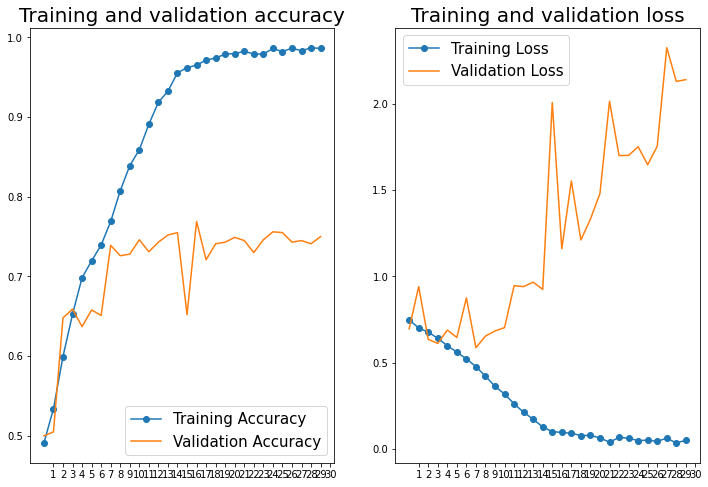

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["binary_accuracy"]
val_accuracy = history.history["val_binary_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
ax1.plot(accuracy, marker='o', label="Training Accuracy")
ax1.plot(val_accuracy, linestyle='-', label='Validation Accuracy')
ax1.set_xticks(np.arange(1, len(accuracy)+1))
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
ax1.set_title("Training and validation accuracy", fontsize=20)
ax1.legend(fontsize=15)
ax2 = fig.add_subplot(122)
ax2.plot(loss, marker='o', label="Training Loss")
ax2.plot(val_loss, linestyle='-', label="Validation Loss")
ax2.set_xticks(np.arange(1, len(loss)+1))
ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)
ax2.set_title("Training and validation loss", fontsize=20)
ax2.legend(fontsize=15)

In [ ]:
model = tf.keras.models.load_model('')
test_loss, test_acc = model.evaluate(test_dataset)
print("Test accuracy:", test_acc)

NameError: ignored

In [ ]:
from tensorflow.keras import models
data_augmentation = models.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(factor=(-0.3, 0.3), fill_mode="constant"),
     layers.experimental.preprocessing.RandomZoom(height_factor=(0.5), fill_mode="wrap"),
    #  layers.experimental.preprocessing.RandomCrop(height=100, width=50)
    ]
)

In [ ]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

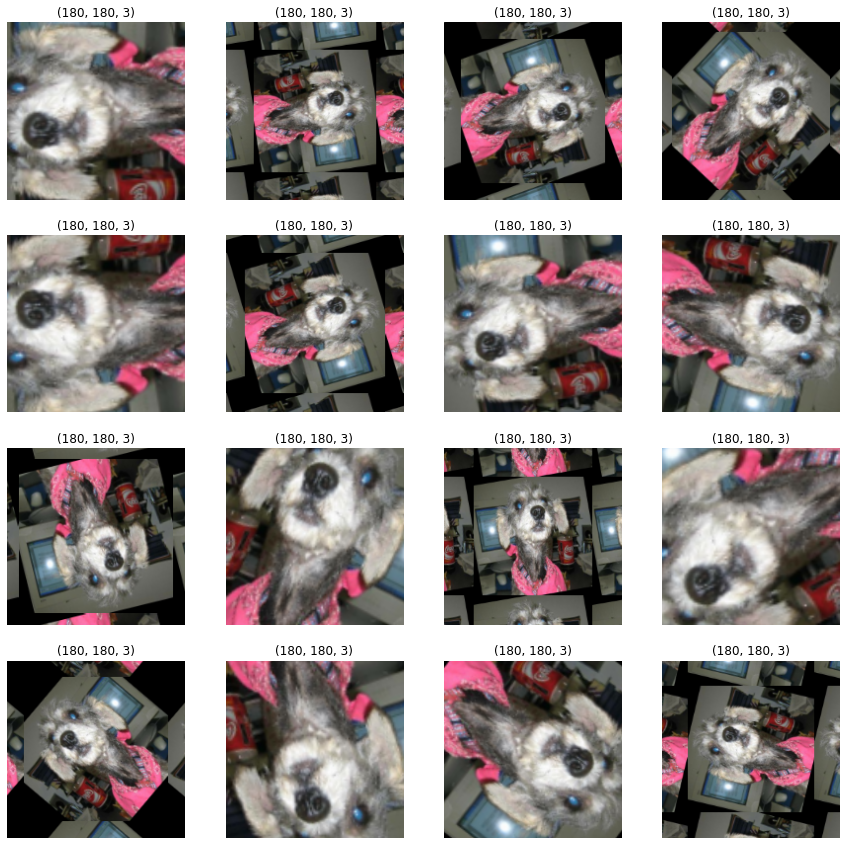

In [ ]:
plt.figure(figsize=(15, 15))
for image, _ in train_dataset.take(1):
  for i in range(16): 
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(data_augmentation(image)[0].numpy().astype('uint8'))
    ax.set_title(data_augmentation(image)[0].shape)
    ax.axis('off')

In [ ]:
from keras.layers import Lambda

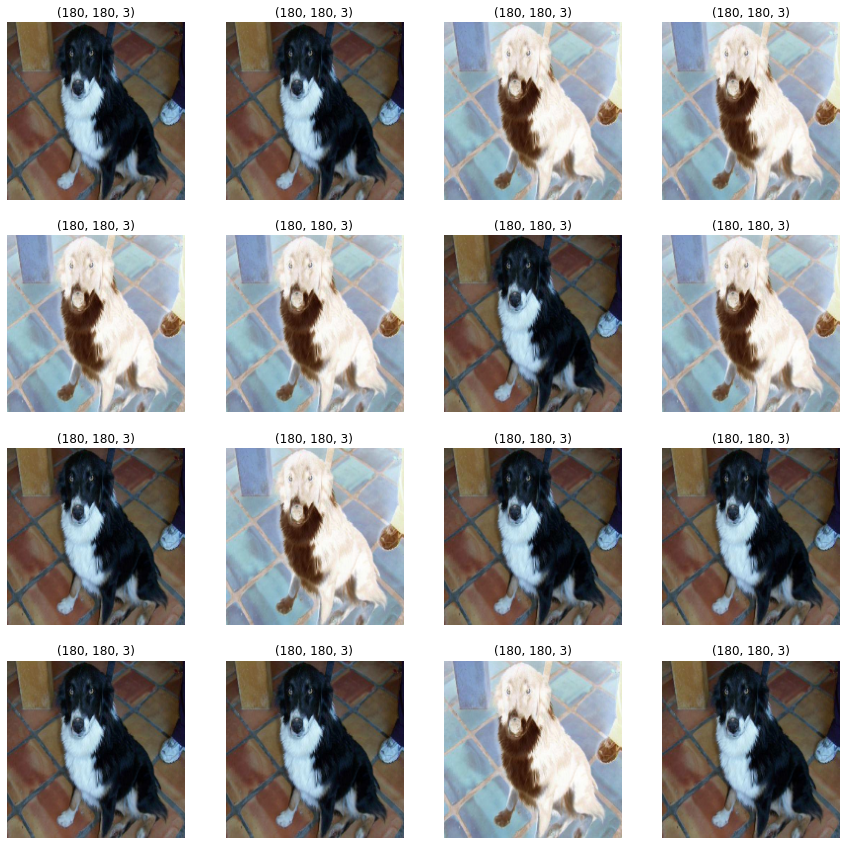

In [ ]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x
def random_invert(x, factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))(x)
plt.figure(figsize=(15, 15))
for image, _ in train_dataset.take(1):
  for i in range(16): 
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(revert(image)[0].numpy().astype('uint8'))
    ax.set_title(revert(image)[0].shape)
    ax.axis('off') 

In [ ]:
import pathlib
path = pathlib.Path('cats_vs_dogs_small')
train_path = path / 'train'
val_path = path / 'validation'
test_path = path / 'test'
train_dataset = keras.preprocessing.image_dataset_from_directory(directory = train_path, image_size=(180, 180), batch_size=32)
val_dataset = keras.preprocessing.image_dataset_from_directory(directory = val_path, image_size=(180, 180), batch_size=32)
test_dataset = keras.preprocessing.image_dataset_from_directory(directory=test_path, image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1/255.)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(rate=0.5)(x)
outputs = layers.Dense(units=1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
callbacks = keras.callbacks.ModelCheckpoint(filepath="model_dropout.keras", monitor='val_binary_accuracy', save_best_only=True)
history = model.fit(
    x=train_dataset,
    epochs=100,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 13s 149ms/step - loss: 0.6957 - binary_accuracy: 0.5030 - val_loss: 0.6924 - val_binary_accuracy: 0.5320
Epoch 2/100
63/63 [==============================] - 9s 136ms/step - loss: 0.6876 - binary_accuracy: 0.5520 - val_loss: 0.7037 - val_binary_accuracy: 0.5540
Epoch 3/100
63/63 [==============================] - 9s 137ms/step - loss: 0.6777 - binary_accuracy: 0.5805 - val_loss: 0.7415 - val_binary_accuracy: 0.5570
Epoch 4/100
63/63 [==============================] - 9s 133ms/step - loss: 0.6901 - binary_accuracy: 0.5370 - val_loss: 0.6896 - val_binary_accuracy: 0.5460
Epoch 5/100
63/63 [==============================] - 9s 136ms/step - loss: 0.6893 - binary_accuracy: 0.5525 - val_loss: 0.6830 - val_binary_accuracy: 0.5310
Epoch 6/100
63/63 [==============================] - 9s 132ms/step - loss: 0.6795 - binary_accuracy: 0.5690 - val_loss: 0.6646 - val_binary_accuracy: 0.6070
Epoch 7/100
63/63 [==============================] - 9s 1

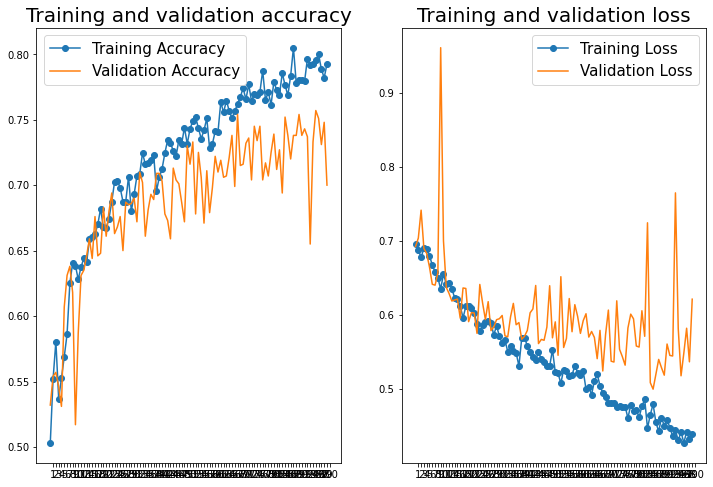

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["binary_accuracy"]
val_accuracy = history.history["val_binary_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
ax1.plot(accuracy, marker='o', label="Training Accuracy")
ax1.plot(val_accuracy, linestyle='-', label='Validation Accuracy')
ax1.set_xticks(np.arange(1, len(accuracy)+1))
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
ax1.set_title("Training and validation accuracy", fontsize=20)
ax1.legend(fontsize=15)
ax2 = fig.add_subplot(122)
ax2.plot(loss, marker='o', label="Training Loss")
ax2.plot(val_loss, linestyle='-', label="Validation Loss")
ax2.set_xticks(np.arange(1, len(loss)+1))
ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)
ax2.set_title("Training and validation loss", fontsize=20)
ax2.legend(fontsize=15)

In [ ]:
test_model = keras.models.load_model("model_dropout.keras")
test_model.evaluate(test_dataset)

32/32 [==============================] - 102s 2s/step - loss: 0.5737 - binary_accuracy: 0.7510


[0.5736857652664185, 0.7509999871253967]

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

## FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

In [ ]:
import numpy as np
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    all_features.append(conv_base.predict(preprocessed_images))
    all_labels.append(all_labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(val_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

In [ ]:
inputs = keras.Input(shape=(5, 5, 12))
x = layers.Flatten()(inputs)
x = layers.Dense(units=256)(x)
x = layers.Dropout(rate=0.5)(x)
outputs = layers.Dense(units=2, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=optermizers.RMSprop(),
    loss=losses.BinaryCrossEntropy(),
    metrics=metrics.BinaryAccuracy()
)
callbacks = keras.callbacks.ModelCheckpont(filepath="feature_extraction.keras", save_best_only=True, monitor='val_loss')
history = model.fit(
    x=train_features,
    y=train_labels,
    epochs=20,
    validation_data=[val_features, val_labels],
    callbacks=callbacks
)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["binary_accuracy"]
val_acc = history.history["val_binary_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.rc('axes', titlesize='Large')
ax1 = plt.subplot(121)
ax1.plot(acc, marker='o', color='blue', label='Training Accuracy')
ax1.plot(val_acc, linestyle='-', color='blue', label='Validation Accuracy')
ax1.set(x_label='Epoch', y_label='Accuracy (%)')
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
ax1.legend(loc='lower right')
ax2 = plt.subplot(122)
ax2.plot(loss, marker='o', color='blue', label='Training Loss')
ax2.plot(val_loss, linestyle='-', color='blue', label='Validation Loss')
ax2.set(x_label='Epoch', y_label='Loss')
ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)
ax2.legend(loc='lower right')

In [ ]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

In [ ]:
conv_base_vgg16 = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    
)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base_vgg16.trainable = True
print("This is the number of trainable weights before freezing the conv base:", len(conv_base_vgg16.trainable_weights))
conv_base_vgg16.trainable = False
print("After freezing:", len(conv_base_vgg16.trainable_weights))

NameError: ignored

In [ ]:
data_augmentation = keras.models.Sequential([
                                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                                             layers.experimental.preprocessing.RandomRotation(factor=0.2),
                                             layers.experimental.preprocessing.RandomZoom(height_factor=0.2)

])

In [ ]:
conv_base_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
import pathlib
path = pathlib.Path('cats_vs_dogs_small')
train_path = path / 'train'
val_path = path / 'validation'
test_path = path / 'test'
train_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=train_path,
    image_size=(180, 180),
    batch_size=32
)
val_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=val_path,
    image_size=(180, 180),
    batch_size=32
)
test_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=test_path,
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
model.fit??

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = conv_base_vgg16(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=256)(x)
x = keras.layers.Dropout(rate=0.5)(x)
outputs = keras.layers.Dense(units=1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=keras.metrics.BinaryAccuracy()
)
callbacks = keras.callbacks.ModelCheckpoint(
    filepath='./feature_extraction_augmentation.keras',
    monitor='val_loss',
    save_best_only=True

)
history=model.fit(
    x=train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/50
63/63 [==============================] - 285s 4s/step - loss: 49.3911 - binary_accuracy: 0.7430 - val_loss: 9.0518 - val_binary_accuracy: 0.9300
Epoch 2/50
63/63 [==============================] - 20s 305ms/step - loss: 25.4446 - binary_accuracy: 0.8020 - val_loss: 7.0575 - val_binary_accuracy: 0.9400
Epoch 3/50
63/63 [==============================] - 20s 303ms/step - loss: 15.9962 - binary_accuracy: 0.8485 - val_loss: 7.3233 - val_binary_accuracy: 0.9300
Epoch 4/50
63/63 [==============================] - 19s 301ms/step - loss: 14.5250 - binary_accuracy: 0.8385 - val_loss: 6.7731 - val_binary_accuracy: 0.9330
Epoch 5/50
63/63 [==============================] - 20s 302ms/step - loss: 9.7060 - binary_accuracy: 0.8565 - val_loss: 4.3457 - val_binary_accuracy: 0.9430
Epoch 6/50
63/63 [==============================] - 20s 304ms/step - loss: 6.7256 - binary_accuracy: 0.8675 - val_loss: 3.7819 - val_binary_accuracy: 0.9420
Epoch 7/50
63/63 [==============================] - 19s 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


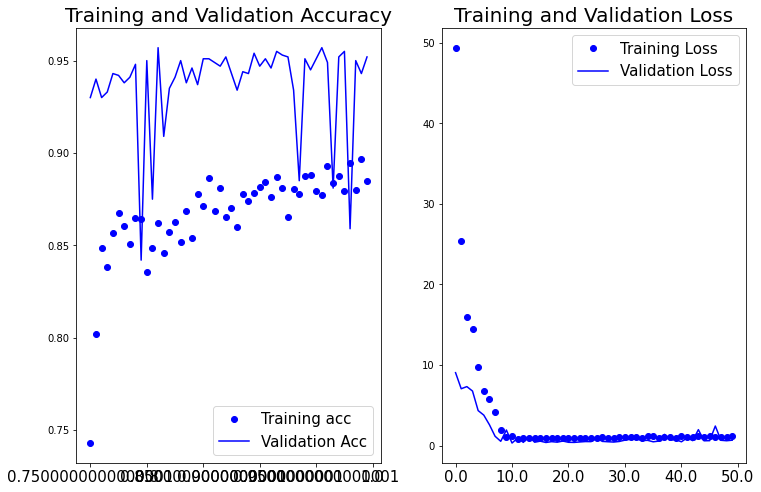

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["binary_accuracy"]
val_acc = history.history["val_binary_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(121)
ax1.plot(acc, 'bo', val_acc, 'b-')
ax1.legend(['Training acc', 'Validation Acc'], loc='bottom right', fontsize=15)
ax1.set_title('Training and Validation Accuracy', fontsize=20)
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
ax1.set_xticklabels(ax1.get_xticks(), fontsize=15)
ax1.set_xticklabels(ax1.get_yticks(), fontsize=15)
ax2 = plt.subplot(122)
ax2.plot(loss, 'bo', val_loss, 'b-')
ax2.legend(['Training Loss', 'Validation Loss'], loc='bottom right', fontsize=15)
ax2.set_title('Training and Validation Loss', fontsize=20)
ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)
ax2.set_xticklabels(ax2.get_xticks(), fontsize=15)
ax2.set_xticklabels(ax2.get_yticks(), fontsize=15);

In [ ]:
test_model = keras.models.load_model('./feature_extraction_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")

32/32 [==============================] - 90s 2s/step - loss: 0.4209 - binary_accuracy: 0.9490
Test accuracy: 0.95


### 8.3.2 Fine-tuning a pretrained model

In [ ]:
conv_base_vgg16.trainable = True
for layer in conv_base_vgg16.layers[:-4]:
  layer.trainable = False

model.compile(
    optimizer=optimizers.RMSprop(1e-5),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
callbacks = keras.callbacks.ModelCheckpoint(
    filepath='finetune_model.keras',
    monitor='val_loss',
    save_best_only=True
)
history = model.fit(
    x=train_dataset,
    epochs=30,
    validation_data=(val_dataset),
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 25s 337ms/step - loss: 0.6483 - binary_accuracy: 0.9030 - val_loss: 0.3415 - val_binary_accuracy: 0.9580
Epoch 2/30
63/63 [==============================] - 21s 331ms/step - loss: 0.4991 - binary_accuracy: 0.9050 - val_loss: 0.2831 - val_binary_accuracy: 0.9580
Epoch 3/30
63/63 [==============================] - 21s 331ms/step - loss: 0.3812 - binary_accuracy: 0.8965 - val_loss: 0.2198 - val_binary_accuracy: 0.9540
Epoch 4/30
63/63 [==============================] - 22s 333ms/step - loss: 0.3843 - binary_accuracy: 0.8940 - val_loss: 0.2092 - val_binary_accuracy: 0.9470
Epoch 5/30
63/63 [==============================] - 21s 332ms/step - loss: 0.3079 - binary_accuracy: 0.9070 - val_loss: 0.2504 - val_binary_accuracy: 0.9440
Epoch 6/30
63/63 [==============================] - 21s 331ms/step - loss: 0.2393 - binary_accuracy: 0.9255 - val_loss: 0.2295 - val_binary_accuracy: 0.9500
Epoch 7/30
63/63 [==============================] - 21s 33

In [ ]:
model = keras.models.load_model('finetune_model.keras')
test_loss, test_acc = model.evaluate(test_dataset)
print("Test accuracy:", test_acc)

32/32 [==============================] - 118s 2s/step - loss: 0.2648 - binary_accuracy: 0.9620
Test accuracy: 0.9620000123977661
